In [1]:
import spot, buddy
spot.setup()

Read input NBA:

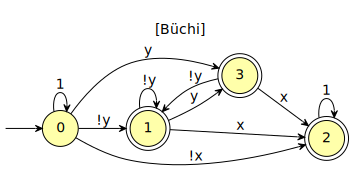

In [2]:
aut = spot.automaton('spec.hoa')
display(aut)

Determinize to DPA:

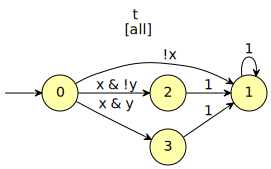

In [3]:
det = aut.postprocess('deterministic', 'parity', 'low')
display(det)

Define controlable APs:

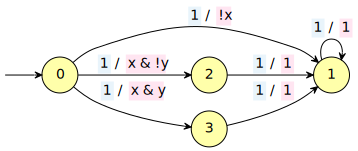

In [4]:
x = buddy.bdd_ithvar(det.register_ap("x"))
y = buddy.bdd_ithvar(det.register_ap("y"))
spot.set_synthesis_outputs(det, x & y)
display(det)

Turn into a game:

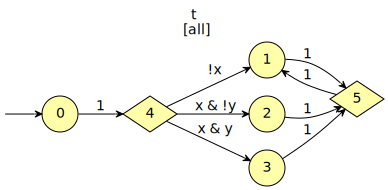

In [5]:
game = spot.split_2step(det, spot.get_synthesis_outputs(det), False)
display(game)

Solve game:

In [6]:
spot.solve_game(game)

True

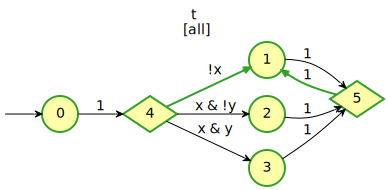

In [7]:
spot.highlight_strategy(game)
display(game)

Extract winning strategy:

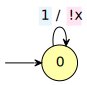

In [8]:
m = spot.solved_game_to_separated_mealy(game)
display(m)

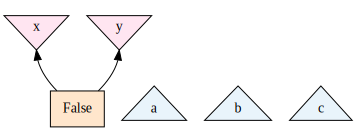

In [9]:
spot.mealy_machine_to_aig(m, "isop")